# NumPy arrays

Nikolay Koldunov

koldunovn@gmail.com

This is part of [**Python for Geosciences**](https://github.com/koldunovn/python_for_geosciences) notes.

================

<img  height="100" src="files/numpy.png" >

-    a powerful N-dimensional array object
-    sophisticated (broadcasting) functions
-    tools for integrating C/C++ and Fortran code
-    useful linear algebra, Fourier transform, and random number capabilities


In [1]:
#allow graphics inline
%matplotlib inline 
import matplotlib.pylab as plt #import plotting library
import numpy as np #import numpy library
np.set_printoptions(precision=3) # this is just to make the output look better

## Load data

I am going to use some real data as an example of array manipulations. This will be the AO index downloaded by wget through a system call (you have to be on Linux of course):

In [2]:
!wget www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii

--2015-06-16 18:16:27--  http://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii
Resolving www.cpc.ncep.noaa.gov... 140.90.101.63
Connecting to www.cpc.ncep.noaa.gov|140.90.101.63|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19625 (19K) [text/plain]
Saving to: 'monthly.ao.index.b50.current.ascii.3'

monthly.ao.index.b5 100%[=====================>]  19.17K  --.-KB/s   in 0.1s   

2015-06-16 18:16:28 (153 KB/s) - 'monthly.ao.index.b50.current.ascii.3' saved [19625/19625]



This is how data in the file look like (we again use system call for *head* command):

In [3]:
!head monthly.ao.index.b50.current.ascii

 1950    1  -0.60310E-01
 1950    2   0.62681E+00
 1950    3  -0.81275E-02
 1950    4   0.55510E+00
 1950    5   0.71577E-01
 1950    6   0.53857E+00
 1950    7  -0.80248E+00
 1950    8  -0.85101E+00
 1950    9   0.35797E+00
 1950   10  -0.37890E+00


Load data in to a variable:

In [4]:
ao = np.loadtxt('monthly.ao.index.b50.current.ascii')

In [5]:
ao

array([[  1.950e+03,   1.000e+00,  -6.031e-02],
       [  1.950e+03,   2.000e+00,   6.268e-01],
       [  1.950e+03,   3.000e+00,  -8.127e-03],
       ..., 
       [  2.015e+03,   3.000e+00,   1.837e+00],
       [  2.015e+03,   4.000e+00,  -9.990e+33],
       [  2.015e+03,   5.000e+00,   7.628e-01]])

In [6]:
ao.shape

(785, 3)

So it's a *row-major* order. Matlab and Fortran use *column-major* order for arrays.

In [7]:
type(ao)

numpy.ndarray

Numpy arrays are statically typed, which allow faster operations

In [8]:
ao.dtype

dtype('float64')

You can't assign value of different type to element of the numpy array:

In [9]:
ao[0,0] = 'Year'

ValueError: could not convert string to float: Year

Slicing works similarly to Matlab:

In [10]:
ao[0:5,:]

array([[  1.950e+03,   1.000e+00,  -6.031e-02],
       [  1.950e+03,   2.000e+00,   6.268e-01],
       [  1.950e+03,   3.000e+00,  -8.127e-03],
       [  1.950e+03,   4.000e+00,   5.551e-01],
       [  1.950e+03,   5.000e+00,   7.158e-02]])

One can look at the data. This is done by matplotlib.pylab module that we have imported in the beggining as `plt`. We will plot only first 780 poins:

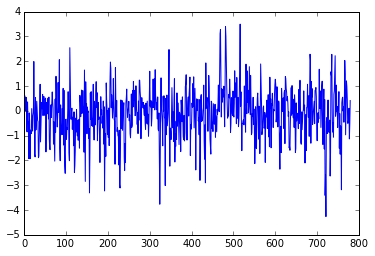

In [11]:
plt.plot(ao[:780,2])

## Index slicing

In general it is similar to Matlab

First 12 elements of **second** column (months). Remember that indexing starts with 0:

In [12]:
ao[0:12,1]

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.])

First raw:

In [13]:
ao[0,:]

array([  1.950e+03,   1.000e+00,  -6.031e-02])

We can create mask, selecting all raws where values in second raw (months) equals 10 (October):

In [14]:
mask = (ao[:,1]==10)

Here we apply this mask and show only first 5 rowd of the array:

In [15]:
ao[mask][:5,:]

array([[  1.950e+03,   1.000e+01,  -3.789e-01],
       [  1.951e+03,   1.000e+01,  -2.129e-01],
       [  1.952e+03,   1.000e+01,  -4.372e-01],
       [  1.953e+03,   1.000e+01,  -1.945e-01],
       [  1.954e+03,   1.000e+01,   5.126e-01]])

You don't have to create separate variable for mask, but apply it directly. Here instead of first five rows I show five last rows:

In [16]:
ao[ao[:,1]==10][-5:,:]

array([[  2.010e+03,   1.000e+01,  -4.670e-01],
       [  2.011e+03,   1.000e+01,   7.997e-01],
       [  2.012e+03,   1.000e+01,  -1.514e+00],
       [  2.013e+03,   1.000e+01,   2.628e-01],
       [  2.014e+03,   1.000e+01,  -1.134e+00]])

You can combine conditions. In this case we select October-December data (only first 10 elements are shown):

In [17]:
ao[(ao[:,1]>=10)&(ao[:,1]<=12)][0:10,:]

array([[  1.950e+03,   1.000e+01,  -3.789e-01],
       [  1.950e+03,   1.100e+01,  -5.151e-01],
       [  1.950e+03,   1.200e+01,  -1.928e+00],
       [  1.951e+03,   1.000e+01,  -2.129e-01],
       [  1.951e+03,   1.100e+01,  -6.852e-02],
       [  1.951e+03,   1.200e+01,   1.987e+00],
       [  1.952e+03,   1.000e+01,  -4.372e-01],
       [  1.952e+03,   1.100e+01,  -1.891e+00],
       [  1.952e+03,   1.200e+01,  -1.827e+00],
       [  1.953e+03,   1.000e+01,  -1.945e-01]])

You can assighn values to subset of values (*thi expression fixes the problem with very small value at 2015-04*)

In [18]:
ao[ao<-10]=0

## Basic operations

Create example array from first 12 values of second column and perform some basic operations:

In [19]:
months = ao[0:12,1]
months

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.])

In [20]:
months+10

array([ 11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.])

In [21]:
months*20

array([  20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,  180.,
        200.,  220.,  240.])

In [22]:
months*months

array([   1.,    4.,    9.,   16.,   25.,   36.,   49.,   64.,   81.,
        100.,  121.,  144.])

## Basic statistics

Create *ao_values* that will contain onlu data values:

In [23]:
ao_values = ao[:,2]

Simple statistics:

In [24]:
ao_values.min()

-4.2656999999999998

In [25]:
ao_values.max()

3.4952999999999999

In [26]:
ao_values.mean()

-0.12138207147770699

In [27]:
ao_values.std()

1.0058073848219578

In [28]:
ao_values.sum()

-95.284926109999986

You can also use *np.sum* function:

In [45]:
np.sum(ao_values)

-95.284926109999986

One can make operations on the subsets:

In [46]:
np.mean(ao[ao[:,1]==1,2]) # January monthly mean

-0.38995600000000002

Result will be the same if we use method on our selected data:

In [47]:
ao[ao[:,1]==1,2].mean()

-0.38995600000000002

## Saving data

You can save your data as a text file

In [48]:
np.savetxt('ao_only_values.csv',ao[:, 2], fmt='%.4f')

Head of resulting file:

In [49]:
!head ao_only_values.csv

-0.0603
0.6268
-0.0081
0.5551
0.0716
0.5386
-0.8025
-0.8510
0.3580
-0.3789


You can also save it as binary:

In [50]:
f=open('ao_only_values.bin', 'w')
ao[:,2].tofile(f)
f.close()